# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [11]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [13]:
# Visit the website
#https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html=browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [14]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [15]:
# Extract all rows of data
table=soup.find('table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [27]:
table.find_all('tr')[1:]

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [26]:
# Initialize list
Lst = [50, 70, 30, 20, 90, 10, 50]
Lst[1:]


[70, 30, 20, 90, 10, 50]

In [28]:
# Create an empty list

empty_list=[]
# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:
    cells=row.find_all('td')
    empty_list.append([cell.get_text(strip=True) for cell in cells])

col_names=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp','pressure']

mars_weather=pd.DataFrame(empty_list, columns=col_names)

#print(mars_weather.head())

In [29]:
mars_weather.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [30]:
mars_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [33]:
mars_weather


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [31]:
mars_weather['id'] = mars_weather['id'].astype(int)


In [34]:
# Change data types for data analysis
#convert to int
mars_weather['id'] = mars_weather['id'].fillna(-1).astype(int)
mars_weather['ls']=mars_weather['ls'].fillna(-1).astype(int)
mars_weather['sol']=mars_weather['sol'].fillna(-1).astype(int)
mars_weather['month']=mars_weather['month'].fillna(-1).astype(int)
#convert to datetime
mars_weather['terrestrial_date'] = pd.to_datetime(mars_weather['terrestrial_date'], errors='coerce')
#min/pressure to float 
mars_weather['min_temp']=mars_weather['min_temp'].fillna(-1).astype(float)
mars_weather['pressure']=mars_weather['pressure'].fillna(-1).astype(float)


print(mars_weather.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [39]:
# 1. How many months are there on Mars?
nmbr_mnths = mars_weather['month'].nunique()
#print(f"There are {nmbr_mnthsmr_mnths} months on Mars.")
nmbr_mnths


12

In [41]:
# 2. How many sols (Martian days) worth of data are there?
nmbr_sols=mars_weather['sol'].nunique()
#print(f"{nmbr_sols} ")
nmbr_sols

1867

In [42]:
# 3. What is the average minimum temperature by month?
avg_min_temp=mars_weather.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


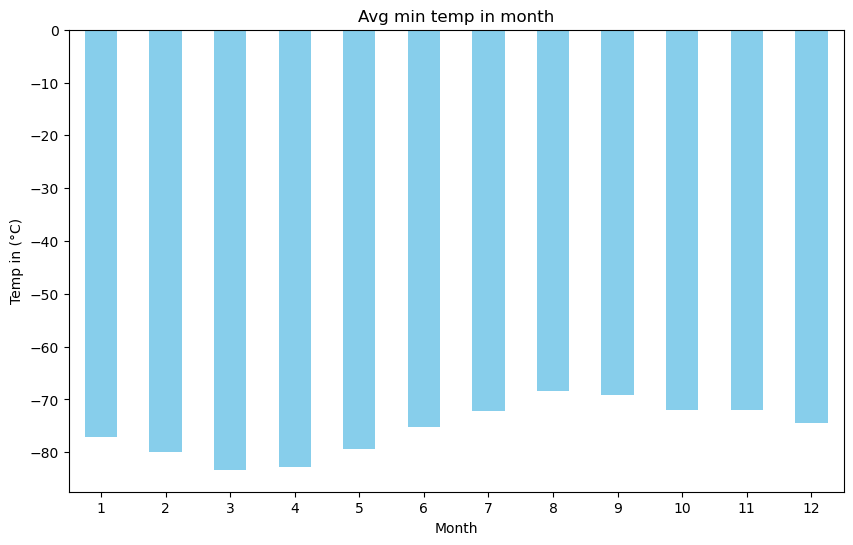

In [44]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp.plot(kind='bar', color='skyblue')
plt.title('Avg min temp in month')
plt.xlabel('Month')
plt.ylabel('Temp in (°C)')


# Save the figure
plt.savefig("Avg min temp in month.png")
plt.show()

In [58]:
avg_min_temp.sort_values().reset_index()['month'].astype(str).values

array(['3', '4', '2', '5', '1', '6', '12', '7', '11', '10', '9', '8'],
      dtype=object)

Coldest Month: 3.0 w/ avg temp -83.30729166666667°C
Hottest Month: 8.0 w/ avg temp -68.38297872340425°C


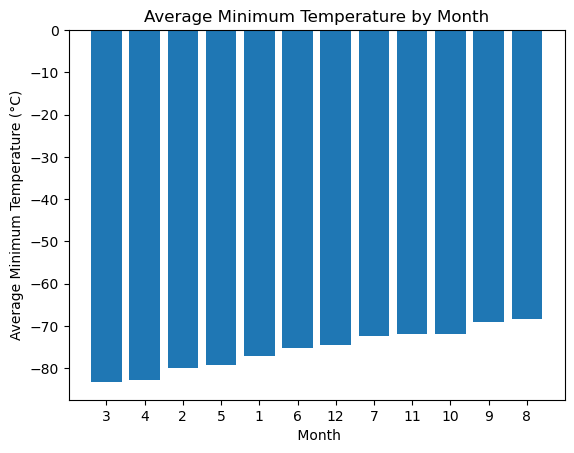

In [59]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the Series by average temperature
sorted_temp = avg_min_temp.sort_values()
# Sort the DataFrame by average temperature
sorted_temp = sorted_temp.reset_index()
#sorted_temp.columns = ['month', 'min_temp']

# Identify the coldest and hottest months
coldest_month = sorted_temp.iloc[0]
hottest_month = sorted_temp.iloc[-1]

print(f"Coldest Month: {coldest_month['month']} w/ avg temp {coldest_month['min_temp']}°C")
print(f"Hottest Month: {hottest_month['month']} w/ avg temp {hottest_month['min_temp']}°C")

# Plotting      
plt.bar(sorted_temp['month'].astype(str).values, sorted_temp['min_temp'].values)
plt.title('Average Minimum Temperature by Month')
plt.xlabel(' Month')
plt.ylabel('Average Minimum Temperature (°C)')


#plt.ylim(sorted_temp['min_temp'].min() - 10, sorted_temp['min_temp'].max() + 10)

# Save the figure
plt.savefig("Average Minimum Temperature by Month'.png")
plt.show()

In [60]:
# 4. What is the average pressure by month?
#convert to number
mars_weather['pressure'] = pd.to_numeric(mars_weather['pressure'], errors='coerce')

avg_prssr_mnth=mars_weather.groupby('month')['pressure'].mean
avg_prssr_mnth

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [64]:
avg_prssr_mnth.index.astype(str)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object', name='month')

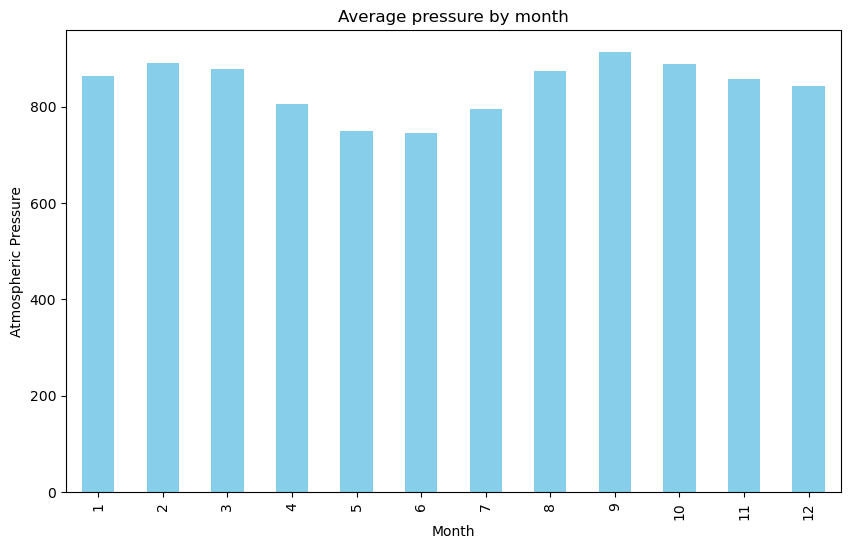

In [65]:
# # Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_prssr_mnth.plot(kind='bar', color='skyblue')
plt.title('Average pressure by month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')


# Save the figure
plt.savefig("Average pressure by month.png")
plt.show()

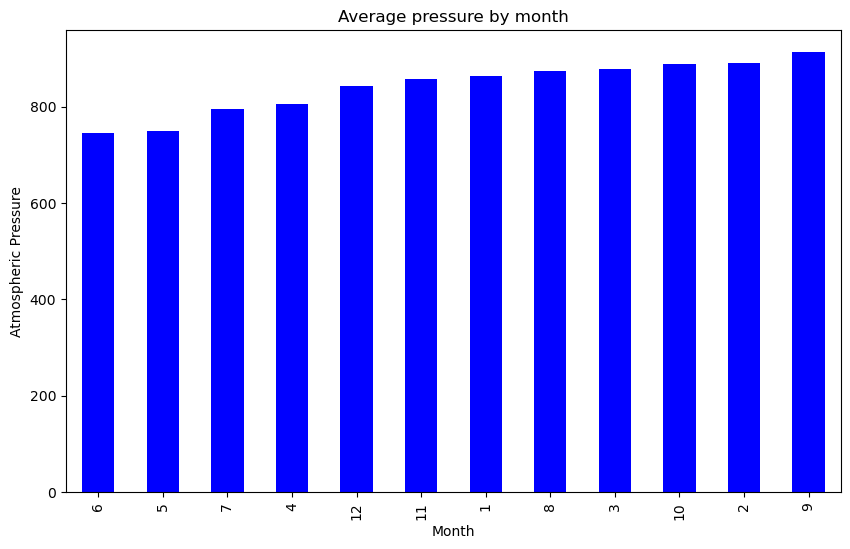

In [67]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# # Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_prssr_mnth.sort_values().plot(kind='bar', color='blue')
plt.title('Average pressure by month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')


# Save the figure
plt.savefig("Average pressure by month.png")
plt.show()

In [68]:
print(mars_weather.columns)
print(mars_weather['terrestrial_date'].head())

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')
0   2012-08-16
1   2012-08-17
2   2012-08-18
3   2012-08-19
4   2012-08-20
Name: terrestrial_date, dtype: datetime64[ns]


In [69]:
mars_weather['terrestrial_date'] = pd.to_datetime(mars_weather['terrestrial_date'], errors='coerce')


In [70]:
print(mars_weather.isnull().sum())

id                  0
terrestrial_date    0
sol                 0
ls                  0
month               0
min_temp            0
pressure            0
dtype: int64


In [ ]:
mars_weather = mars_weather.dropna(subset=['terrestrial_date', 'min_temp'])



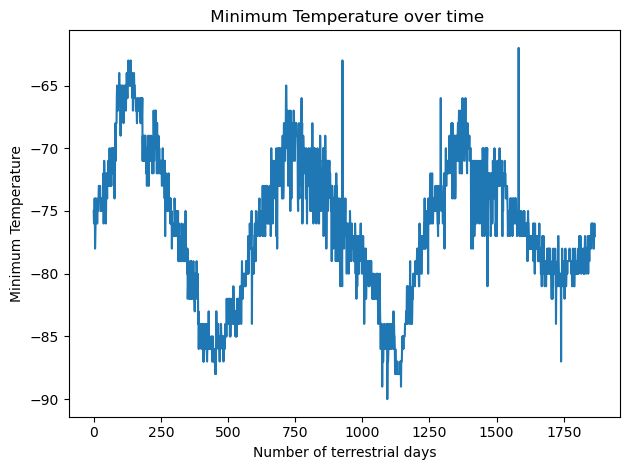

In [75]:
mars_weather['min_temp'].plot()
# Add titles and labels
plt.title(' Minimum Temperature over time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')



# Show the plot
#plt.tight_layout()
plt.show()


#### Minimum Temperature
# Which month, on average, has the lowest temperature? The highest?
# Coldest Month: 3.0 w/ avg temp -83.30729166666667°C
# Hottest Month: 8.0 w/ avg temp -68.38297872340425°C

#### Atmospheric Pressure
# Which month, on average, has the lowest atmospheric pressure? The highest? 
# Lowest 700
# Highest 900


#### Year Length
# How many terrestrial days exist in a Martian year? A visual estimate within 25% was made. 
# 1800

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [77]:
# Write the data to a CSV
mars_weather.to_csv("Mars_Weather_Data.csv")

In [78]:
browser.quit()